In [2]:
from ultralytics import YOLO

# Load a model
model = YOLO('/Users/apaula/Library/CloudStorage/GoogleDrive-elysiacristata@gmail.com/My Drive/datasets/runs/pose/train2/weights/best.pt')

# Predict with the model
results = model('/Users/apaula/src/SharkVideoAnalysis/tiles/frame_2_tile_14.jpg') 



image 1/1 /Users/apaula/src/SharkVideoAnalysis/tiles/frame_2_tile_14.jpg: 320x320 134 fishs, 29.7ms
Speed: 1.0ms preprocess, 29.7ms inference, 1.6ms postprocess per image at shape (1, 3, 320, 320)


In [3]:
# Assuming 'results' is a list containing one 'Results' object as indicated
results_object = results[0]  # Access the first (and presumably only) Results object

# Access the keypoints from the Results object
keypoints = results_object.keypoints

# Now, let's safely access the keypoints data
if keypoints is not None:
    # The 'xy' attribute for coordinates, 'conf' for confidence scores
    # Convert tensor data to numpy arrays if necessary
    kp_xy = keypoints.xy.cpu().numpy()  # Coordinates of keypoints
    kp_conf = keypoints.conf.cpu().numpy()  # Confidence scores of keypoints


In [6]:
results[0].keypoints

ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9929, 0.9939],
        [0.9832, 0.9823],
        [0.9551, 0.8742],
        [0.9887, 0.9627],
        [0.9964, 0.9962],
        [0.9330, 0.9893],
        [0.9955, 0.9967],
        [0.9816, 0.9683],
        [0.9826, 0.9959],
        [0.9848, 0.9761],
        [0.9736, 0.9770],
        [0.9840, 0.9782],
        [0.8518, 0.6419],
        [0.9799, 0.9677],
        [0.9942, 0.9869],
        [0.5726, 0.3634],
        [0.8370, 0.5255],
        [0.9817, 0.9861],
        [0.9807, 0.9903],
        [0.9926, 0.9873],
        [0.9936, 0.9885],
        [0.8221, 0.7266],
        [0.9931, 0.9895],
        [0.9863, 0.9872],
        [0.9880, 0.9872],
        [0.9852, 0.9775],
        [0.9893, 0.9924],
        [0.7521, 0.4336],
        [0.9896, 0.9891],
        [0.9353, 0.9642],
        [0.9722, 0.9928],
        [0.9897, 0.9711],
        [0.9841, 0.9570],
        [0.9158, 0.9930],
        [0.9960, 0.9897],
        [0.9042, 0.959

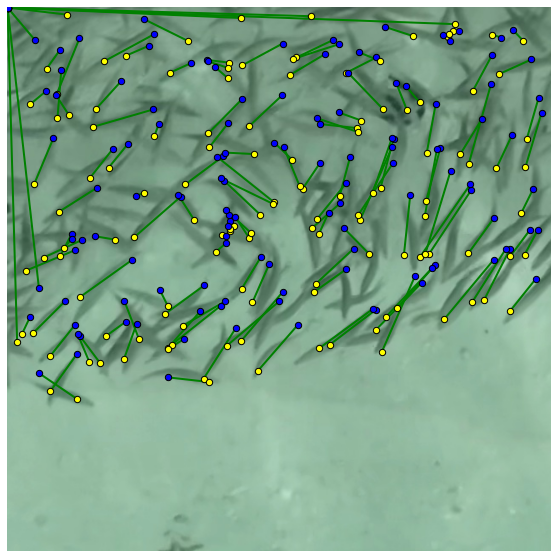

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the original image
image_path = '/Users/apaula/src/SharkVideoAnalysis/tiles/frame_2_tile_14.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib

# kp_xy as provided, now iterating directly over it
# Assuming kp_xy is already available in your environment as shown

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(image)

# Define colors for each point in the pair and for the connecting line
color_point1 = 'yellow'
color_point2 = 'blue'
color_line = 'green'

# Iterate over each pair of keypoints in kp_xy
for pair in kp_xy:
    point1, point2 = pair  # Unpack the pair of keypoints

    # Plot each point in the pair with different colors
    plt.scatter(point1[0], point1[1], c=color_point1, s=40, zorder=2, edgecolors='black')  # Add edge for visibility
    plt.scatter(point2[0], point2[1], c=color_point2, s=40, zorder=2, edgecolors='black')  # Add edge for visibility

    # Draw a line between the points in the pair
    plt.plot([point1[0], point2[0]], [point1[1], point2[1]], color=color_line, linewidth=2, zorder=1)

plt.axis('off')
plt.show()


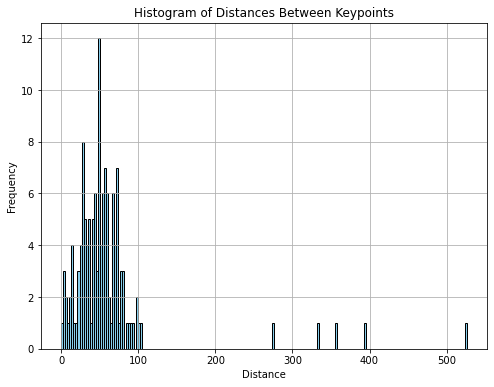

In [14]:
# Calculate Euclidean distances for each pair in kp_xy
distances = np.linalg.norm(kp_xy[:, 0, :] - kp_xy[:, 1, :], axis=1)

# Plot a histogram of the distances
plt.figure(figsize=(8, 6))
plt.hist(distances, bins=200, color='skyblue', edgecolor='black')
plt.title('Histogram of Distances Between Keypoints')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [20]:
# Calculate distances
distances = np.linalg.norm(kp_xy[:, 0, :] - kp_xy[:, 1, :], axis=1)

# Filter pairs based on the specified distance range
distance_range = (25, 150)
filtered_indices = np.where((distances >= distance_range[0]) & (distances <= distance_range[1]))[0]

# Apply filtering to keep only the pairs within the specified distance range
filtered_kp_xy = kp_xy[filtered_indices]

# Output the filtered pairs and their distances for reference
filtered_kp_xy, distances[filtered_indices]

(array([[[     284.56,      139.38],
         [     323.35,      103.06]],
 
        [[     85.174,      340.81],
         [        146,      297.36]],
 
        [[     212.61,      39.382],
         [     160.04,      13.321]],
 
        [[     398.42,      76.863],
         [     434.13,      58.624]],
 
        [[      379.4,      396.71],
         [     433.46,      355.64]],
 
        [[     294.23,      428.03],
         [     341.53,      373.67]],
 
        [[     60.879,      240.11],
         [     104.76,      212.34]],
 
        [[     514.09,      366.77],
         [     572.05,      297.15]],
 
        [[     113.58,      63.202],
         [     171.88,      31.638]],
 
        [[     29.909,      383.24],
         [      67.39,      345.87]],
 
        [[     275.48,      331.17],
         [     298.29,      293.37]],
 
        [[     591.44,      357.35],
         [     622.15,      318.92]],
 
        [[      496.5,      289.51],
         [      545.5,      215.28]],
 

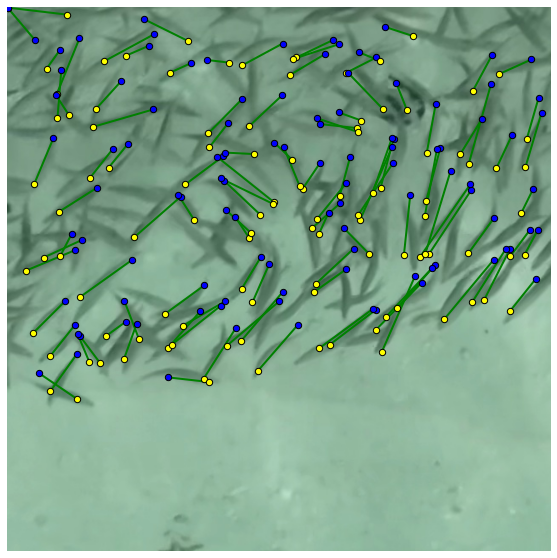

In [21]:
# Load the original image
image_path = '/Users/apaula/src/SharkVideoAnalysis/tiles/frame_2_tile_14.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib

# kp_xy as provided, now iterating directly over it
# Assuming kp_xy is already available in your environment as shown

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(image)

# Define colors for each point in the pair and for the connecting line
color_point1 = 'yellow'
color_point2 = 'blue'
color_line = 'green'
# Iterate over each pair of keypoints in kp_xy
for pair in filtered_kp_xy:
    point1, point2 = pair  # Unpack the pair of keypoints

    # Plot each point in the pair with different colors
    plt.scatter(point1[0], point1[1], c=color_point1, s=40, zorder=2, edgecolors='black')  # Add edge for visibility
    plt.scatter(point2[0], point2[1], c=color_point2, s=40, zorder=2, edgecolors='black')  # Add edge for visibility

    # Draw a line between the points in the pair
    plt.plot([point1[0], point2[0]], [point1[1], point2[1]], color=color_line, linewidth=2, zorder=1)

plt.axis('off')
plt.show()


/var/folders/fp/69w3242x183607ffnzm682500000gp/T/ipykernel_22566/306707003.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('hsv')


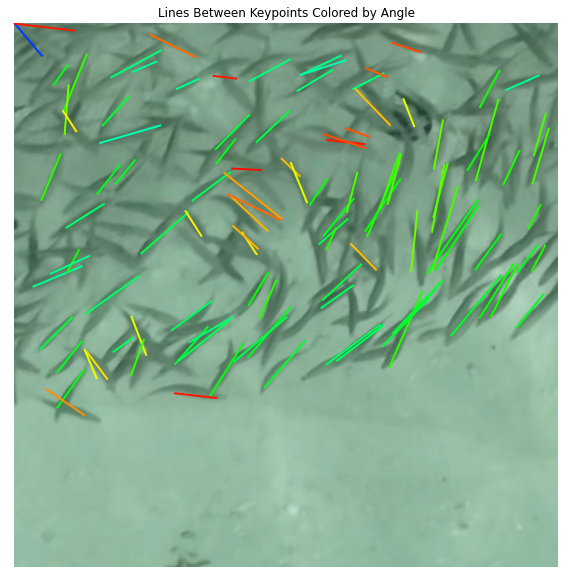

In [24]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Function to calculate angles in radians between pairs of keypoints
def calculate_angles(kp_pairs):
    # Calculate the difference in coordinates
    deltas = kp_pairs[:, 1, :] - kp_pairs[:, 0, :]
    # Calculate the angle using arctan2, which returns angles in radians
    angles = np.arctan2(deltas[:, 1], deltas[:, 0])
    return angles

# Calculate angles for the filtered keypoint pairs
angles = calculate_angles(filtered_kp_xy)

# Normalize the angles to the range [0, 1] for colormap mapping
# The angle range of arctan2 is [-pi, pi], so we normalize accordingly
normalized_angles = (angles + np.pi) / (2 * np.pi)

# Use a circular colormap ('hsv')
colormap = cm.get_cmap('hsv')
colors = colormap(normalized_angles)
# Load the original image
image_path = '/Users/apaula/src/SharkVideoAnalysis/tiles/frame_2_tile_14.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib

# kp_xy as provided, now iterating directly over it
# Assuming kp_xy is already available in your environment as shown

# Plotting
plt.figure(figsize=(10, 10))
plt.imshow(image)
# Plot each line with color according to its angle
for pair, color in zip(filtered_kp_xy, colors):
    plt.plot([pair[0][0], pair[1][0]], [pair[0][1], pair[1][1]], color=color, linewidth=2)

plt.axis('equal')
plt.axis('off')
plt.title('Lines Between Keypoints Colored by Angle')
plt.show()


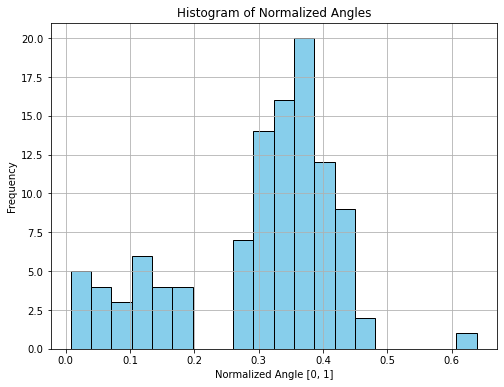

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Function to calculate angles in radians between pairs of keypoints
def calculate_angles(kp_pairs):
    # Calculate the difference in coordinates
    deltas = kp_pairs[:, 1, :] - kp_pairs[:, 0, :]
    # Calculate the angle using arctan2, which returns angles in radians
    angles = np.arctan2(deltas[:, 1], deltas[:, 0])
    return angles

# Calculate angles for the filtered keypoint pairs
angles = calculate_angles(filtered_kp_xy)

# Normalize the angles to the range [0, 1] for colormap mapping
# The angle range of arctan2 is [-pi, pi], so we normalize accordingly
normalized_angles = (angles + np.pi) / (2 * np.pi)

# Plot a histogram of the normalized angles
plt.figure(figsize=(8, 6))
plt.hist(normalized_angles, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Normalized Angles')
plt.xlabel('Normalized Angle [0, 1]')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
